In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import matplotlib.pyplot as plt

# 3. Statistical Experiments and Significance Testing

Design of experiments is a cornerstone of the practice of statistics, with applications in virtually all areas of research. The goal is to design an experiment in order to confirm or reject a hypothesis. Data scientists often need to conduct continual experiments, particularly regarding user interface and product marketing.

#### A/B Testing

An A/B test is an experiment with two groups to establish which of two treatments, products, prcedures, or the like is superior. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called _control_. A typical hypothesis is that a new treatment is better than the control.


<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Treatment</td>
        <td>Something (drug, price, web headline) to which a subject is exposed.</td>
    </tr>
    <tr>
        <td>Treatment group</td>
        <td>A group of subjects exposed to a specific treatment</td>
    </tr>
    <tr>
        <td>Control group</td>
        <td>A group of subjects exposed to no (or standard) treatment</td>
    </tr>
    <tr>
        <td>Randomization</td>
        <td>The process of randomly assigning subjects to treatments</td>
    </tr>
    <tr>
        <td>Subjects</td>
        <td>The items (web visitor, patients, etc.) that are exposed to treatments</td>
    </tr>
    <tr>
        <td>Test statistic</td>
        <td>The metric used to measure the effect of the treatment</td>
    </tr>
</table>

A/B testing are common in web design and marketing, since results are so readily measured.

#### Hypothesis Tests

Hypothesis tests, also called _significance tests_, are ubiquitous in the traditional statistical analysis of published research. Their purpose is to help you to learn whether random chance might be responsible for an observed effect.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Null hypothesis</td>
        <td>The hypothesis tha chance is to blame.</td>
    </tr>
    <tr>
        <td>Alternative hypothesis</td>
        <td>Counterpoint to the null (what you hope to prove)</td>
    </tr>
    <tr>
        <td>One-way test</td>
        <td>Hypothesis test that counts chance results only in one direction</td>
    </tr>
    <tr>
        <td>Two-way test</td>
        <td>Hypothesis test that counts chance results in two directions</td>
    </tr>
</table>

#### The Null Hypothesis

Hypothesis tests use the following logic: "Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably produce." This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due tochance. This baseline assumption is termed the _null hypothesis_. Our hope, then is that we can in fact prove the null hypothesis _wrong_ and show that outcomes for groups A and B are more different than what chance might produce.

#### Alternative Hypothesis

Hypothesis tests by their nature involve not just a null hypothesis but also an offsetting alternative hypothesis.

* NULL = "no difference between means of group A and B"; alternative = "A is different from B"
* NULL = "A <= B"; alternative = "A > B"
* NULL = "B is not X% greater then A"; alternative = "B is X% greater than A"

Taken together, the null and alternative hypothesis must account for all possibilities. The nature of the null hypothesis determines the structure of the hypothesis test.

#### Resampling

_Resampling_ in statistics means to repeatedly sample values from observed data, with a general goal f assessing random variability in statistic. It can also be used to assess and improve accuracy of some machine-learning models.


<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Permuattion test</td>
        <td>The procedure of combining two r more samples together and randomly (or exhaustively) reallocating the observations to resample.</td>
    </tr>
    <tr>
        <td>Resampling</td>
        <td>Drawing additional samples ("resamples") from an observed data set.</td>
    </tr>
    <tr>
        <td>With or without replacement</td>
        <td>In sampling, whether or not an item is returned to the sample before the next draw.</td>
    </tr>
</table>

#### Permutation test

In a _permutation_ procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis tests. _Permute_ means to change the order of a set of values. The first step in a _permutation test_ of a hypothesis is to combine the results from groups A and B (and, if used C, D, ...). This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another.


In [2]:
# Example of a permutation test
session_times = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/web_page_data.csv")
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


Text(0.5, 0.98, '')

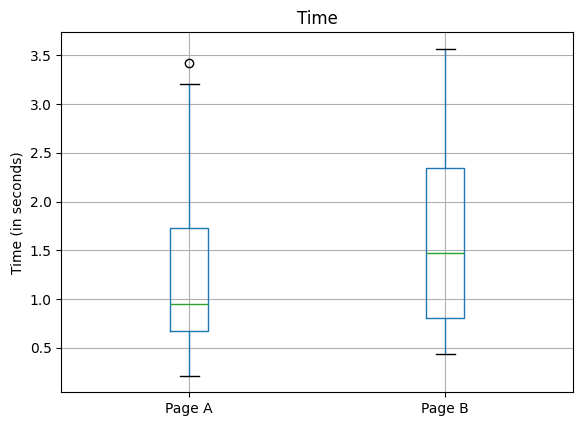

In [5]:
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [6]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(f'Difference between means: {mean_b - mean_a:.4f}')

Difference between means: 0.3567


In [7]:
# Page B has session times grater than those of page A by 35.67 seconds, on average. The question
# is whether this difference is within tha range of what random chance might produce. One way to
# answer this is to apply a permutation test - combine all session times together and then repeatedly
# shuffle and divide them into groups.
import random

def perm_fun(x, nA, nB):
	n = nA + nB
	idx_B = set(random.sample(range(n), nB))
	idx_A = set(range(n)) - idx_B
	return x.loc[list(idx_B)].mean()  - x.loc[list(idx_A)].mean()

# This function works by sampling (without replacements) nB indices and assigning them to the
# B group; the renaming nA indices are assigned to group A. The difference between the two means
# is returned. Calling R=1000 times leads to a distribution of differences int the session times
# that can be plotted as a histogram

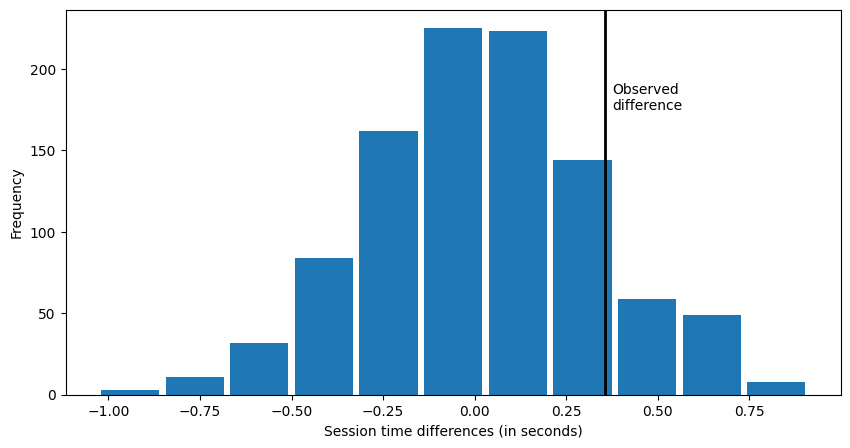

In [8]:
perm_diffs = [perm_fun(session_times.Time, 21, 15) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=mean_b - mean_a, color='black', lw=2)
ax.text(0.375, 175, 'Observed\ndifference')
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
plt.show()

#### Statistica Significante and p-Values

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme that what chance might produce. If the result is beyond the realm of chance variation, it is said to be statistically significant.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>p-value</td>
        <td>Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.</td>
    </tr>
    <tr>
        <td>Alpha</td>
        <td>The probability threshold of "unusualness" that chance results must surpass for actual outcomes to be deemed statistically significant</td>
    </tr>
    <tr>
        <td>Type 1 error</td>
        <td>Mistakenly concluding and effect is real (when it is due to chance)</td>
    </tr>
    <tr>
        <td>Type 2 error</td>
        <td>Mistankenly concluding an effect is due to chance (when it is real)</td>
    </tr>
</table>


Observed differences: 0.036758%


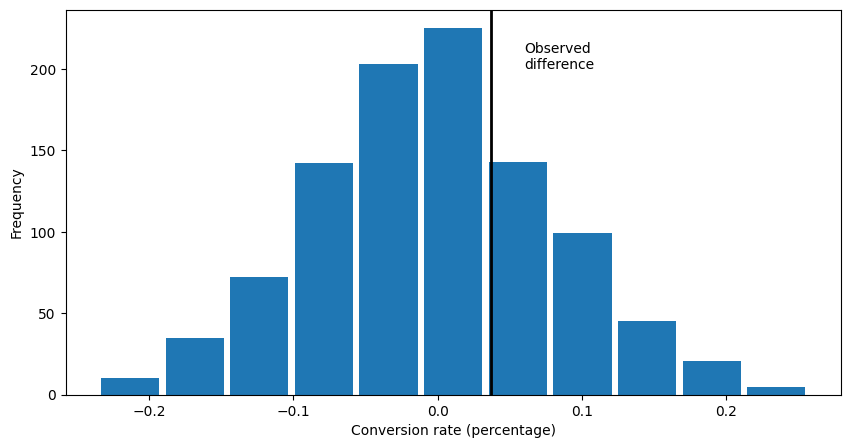

In [10]:
obs_pct_diff = 100 * (200/23739 - 182/22588)
print(f'Observed differences: {obs_pct_diff:4f}%')

conversions = [0] * 45945
conversions.extend([1] * 382)
conversions = pd.Series(conversions)

perm_diffs = [100 * perm_fun(conversions, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference')
ax.set_xlabel('Conversion rate (percentage)')
ax.set_ylabel('Frequency')
plt.show()

#### p-Value

Simply looking at the graph is ot a very precise way to measure statistical significance, so of more interest is the _p-value_. This is the frequency with which the chance model produces a result more extreme than the observed result.

In [ ]:
# We can estimate a p-value from our permutation test by taking the proportion of times that the
# permutation test poduces a difference equal to or greater than the observed difference

print(f"p-value approximation: {np.mean([diff > obs_pct_diff for diff in perm_diffs]):.3f}")

p-value approximation: 0.313


In [21]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
print(f"p-value for single sided tests: {p_value / 2:.4f}")

p-value for single sided tests: 0.3498


#### t-Tests

There are numerous types of significance tests, depending on whether the data comprises count data data or measured data, how many samples there are, and what's being measured. A very common one is the _t-test_, originally developed to approximate the distribution of a single sample mean.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Test statistic</td>
        <td>A metric for the difference or effect of interest</td>
    </tr>
    <tr>
        <td>t-statistic</td>
        <td>A standardized version of common test statistics as means</td>
    </tr>
    <tr>
        <td>t-distribution</td>
        <td>A reference distribution (in this case derived from the null hypothesis), to which the observed t-statistic can be compared</td>
    </tr>
</table>

All significance tests require that you specif a _test statistic_ to measure the effect you are interested in and help you determine whther that observed effect lies within the range of normal chance variation.

In [ ]:
# The alternative hypothesis is that the session time mean for Page A is less than that for Page B.
res = stats.ttest_ind(
	session_times[session_times.Page == 'Page A'].Time,
	session_times[session_times.Page == 'Page B'].Time,
	equal_var=False
)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


#### Multiple Testing

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Type 1 error</td>
        <td>Mistakenly concluding that an effect is statistically significant</td>
    </tr>
    <tr>
        <td>False discovery rate</td>
        <td>Across multiple tests, the rate of making a Type 1 error</td>
    </tr>
    <tr>
        <td>Alpha inflation</td>
        <td>The multiple testing phenomenon, in which alpha, the probability of making a Type 1 error, increases as you conduct more tests.</td>
    </tr>
    <tr>
        <td>Adjustment of p-values</td>
        <td>Accounting for doing multiple tests on the same data</td>
    </tr>
    <tr>
        <td>Overfitting</td>
        <td>Fitting the noise</td>
    </tr>
</table>

In supervised leargning tasks, a holdout set where models are assessed on data that the model has not seen before mitigates this risk. In statistical and machine learning tasks not involving a labeled holdout set, the risk of reaching conclusions based on statistical noise persists.

#### Degreees of freedom

In the documentation and settings for many statistical tests and probability distributions, you will see a reference to "degrees of freedom". The concept is applied to statistics calculated from sample data, and refers to the number of values free to vary.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>n or sample size</td>
        <td>The number of observations (also called rows or records) in the data</td>
    </tr>
    <tr>
        <td>d.f</td>
        <td>Degrees of freedom</td>
    </tr>
</table>

There is one context, in data science, in which it is relevant: the use of factored variables in regression (including logistic regression). Some regression algorithms choke if exactly redundant predictor variables are present. This most commonly occurs when factring categorical vairables into binary indicators (dummies). Consider the variable "day of week". Altough there are seven days of the week, there are only six degrees of freedom in specifying day of week. For example, once you know that day of week is not Monday through Saturday, you know it must be Sunday. Inclusion of the Mon-Sat indicators thus means that also including Sunday would cause the regression to fail, due to a multicollinearity error.

#### ANOVA

Suppose that, instead of an A/B tests, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a statistically significant difference among the groups is called _analysis o variance_, or ANOVA.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Pairwise comparison</td>
        <td>A hypothesis (e.g., of means) between two groups among multiple groups</td>
    </tr>
    <tr>
        <td>Omnibus test</td>
        <td>A single hypothesis test of the overall variance among multiple group means</td>
    </tr>
    <tr>
        <td>Decomposition of variance</td>
        <td>Separation of components contributing to an individual value (e.g., from the overall average, from a treatment mean, and from a residual error)</td>
    </tr>
    <tr>
        <td>F-statistic</td>
        <td>A standardized statistic that measures the extent to which differences among group means exceed what might be expected in a chance model.</td>
    </tr>
    <tr>
        <td>SS</td>
        <td>"Sum of squares", referring to deviations from some average values</td>
    </tr>
</table>

In [2]:
four_sessions = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/refs/heads/master/data/four_sessions.csv')
four_sessions.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


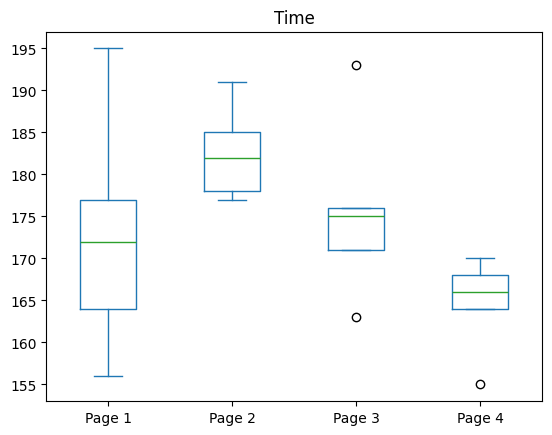

In [5]:
four_sessions.plot.box(by='Page');

Instead of worrying about all the different comparisons between individual pages we could possibly make, we can do a single overall testa that addresses the question, "Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?"

The procedure use to test this is ANOVA. The basis for it can be seen in the following resampling procedure:

1. Combine all the data together in a single box
2. Shuffle and draw out four resamples of five values each
3. Record the mean of each of the four groups
4. Record the variance among the four group means
5. Repeat steps 2-4 many times

What proportion of the time did the resamples variance exceeded the observed variances? This is the p-value.

In [11]:
observed_variance = four_sessions.groupby('Page').mean().var().Time

print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
	df = df.copy()
	df['Time'] = np.random.permutation(df['Time'].values)
	return df.groupby('Page').mean().var().Time

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
Pr(Prob) 0.08


#### F-Statistic

Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, the is a statistical test for ANOVA based on the _F-statistic_. The F-statistic is based on the ration of the variance accross group means to the variance due to residual error. The higher this ratio, the more statistically significant the result. If the data follows a normal distribution, the statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute the p-value.

In [14]:
# The statsmodels package provides an ANOVA implementation in Python
model = smf.ols('Time ~ Page', data=four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


#### Two-Way ANOVA

The A/B/C/D test just described is "one-way" ANOVA, in which we have on factor (group) that is varying. We could have a second factor involved - say, "weekend versus weekday" - with data collected on each combination (group A weeken, group A weekday, group B weekeend, etc.). This would be a "two-way ANOVA", and we would handle it in similar fasshin on the one-way ANOVA by identifying the "interaction effect".

#### Chi-Square Test

Web testing often goes beyond A/B testing and tests multiple treatments at once. The chi-square test is used with count data to test how well it fits some expected distribution.

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Term</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Chi-square statistic</td>
        <td>A measure of the extent to which some observed data departs from expectation.</td>
    </tr>
    <tr>
        <td>Expectation or expected</td>
        <td>How we would expect the data to turn out under some assumption, typically the null hypothesis</td>
    </tr>
</table>